# 调整图片为星际2可用贴图格式

1. 调整alpha透明度
2. 调整宽高比为正方形（alpha填充）
3. 针对button，调整到统一的大小（76*76）
4. 转换为`*.dds`

### 安装dds转换依赖

Wand库：https://imagemagick.org/script/download.php#windows

In [3]:
%pip install Wand

Note: you may need to restart the kernel to use updated packages.


In [60]:
import os
import io

In [46]:
from PIL import Image as PilImage
from wand.image import Image as WandImage

## 1. 读取文件并转换宽高比

In [48]:
def resize_by_width(image_path, new_width):
    """
    按固定宽度调整图像大小，同时保持宽高比。

    :param image_path: 输入图片路径
    :param new_width: 新的宽度
    :param output_path: 输出图片路径
    """
    img = PilImage.open(image_path)
    # 计算新的高度
    width_percent = (new_width / float(img.size[0]))
    new_height = int((float(img.size[1]) * float(width_percent)))
    # 调整图像大小
    resized_img = img.resize((new_width, new_height), PilImage.Resampling.LANCZOS)
    return resized_img

In [50]:
resized_img = resize_by_width('../data/png/多彩核弹/btn-ability-terran-armnuke-black.png',new_width=76)

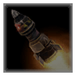

In [52]:
resized_img

## 2.转换并输出到目录

In [ ]:
def process_and_convert_to_dds(pil_image, dds_path, compression='dxt5'):
    """
    接收一个 Pillow 图像对象，进行处理（可选），然后转换为 DDS。

    :param pil_image: 输入的 Pillow Image 对象。
    :param dds_path: 输出的 DDS 文件路径。
    :param compression: DDS 压缩格式。
    """
    try:
        # --- 核心步骤：将 Pillow 对象转换为 Wand 对象 ---
        image_binary = io.BytesIO()
        pil_image.save(image_binary, format='png')
        image_binary.seek(0)
        
        with WandImage(blob=image_binary.read()) as img:
            # 现在 img 是一个 wand 对象，可以进行 wand 的操作
            img.options['dds:compression'] = compression
            img.options['dds:mipmaps'] = '7'
            img.save(filename=dds_path)
            
        print(f"成功将处理后的图像转换为 '{dds_path}' (压缩格式: {compression})")

    except Exception as e:
        print(f"转换失败: {e}")

In [81]:
def convert_png_to_dds(png_image_obj, save_fname, dds_save_folder, compression='dxt5'):
    """
    使用 Wand (ImageMagick) 将 PNG 转换为 DDS。

    :param png_path: 输入的 PNG 文件路径。
    :param dds_path: 输出的 DDS 文件路径。
    :param compression: DDS 压缩格式 (例如 'dxt1', 'dxt5', 'none')。
    """
    try:
        # --- 核心步骤：将 Pillow 对象转换为 Wand 对象 ---
        image_binary = io.BytesIO()
        png_image_obj.save(image_binary, format='png')
        image_binary.seek(0)
        
        with WandImage(blob=image_binary.read()) as img:
            # 现在 img 是一个 wand 对象，可以进行 wand 的操作
            img.options['dds:compression'] = compression
            img.options['dds:mipmaps'] = '7'
            
            img.save(filename=os.path.join(dds_save_folder,save_fname.replace('.png','.dds')))
        print(f"成功将 '{save_fname}' 转换保存到 '{dds_save_folder}' (压缩格式: {compression})")
    except Exception as e:
        print(f"转换失败: {e}")

## 3.批量转换

In [84]:
png_folder = '../data/png/多彩核弹/'
for fname in os.listdir(png_folder):
    resized_img = resize_by_width(os.path.join(png_folder, fname),76)
    convert_png_to_dds(png_image_obj=resized_img,save_fname=fname,dds_save_folder='../data/assets/')

成功将 'btn-ability-terran-armnuke-black.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
成功将 'btn-ability-terran-armnuke-blue.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
成功将 'btn-ability-terran-armnuke-green.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
成功将 'btn-ability-terran-armnuke-red.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
成功将 'btn-ability-terran-armnuke-white.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
成功将 'btn-ability-terran-armnuke-yellow.png' 转换保存到 '../data/assets/' (压缩格式: dxt5)
